# Tarea 2

## Jonathan Alexis Urrutia Anguiano 41401102-5
## Física computacional
## Ricardo Méndez

In [1]:
from pylab import *
%matplotlib inline

# Ejercicio 1

Deseamos encontrar todas las raíces de una función en un intervalo dada. Primero se utilizará un método parecido al de beisección visto en clase para encontrar subconjuntos de longitud $h$ del intervalo en donde se encuentren raíces. Se verá si el producto de los extremos de cada intervalo es positivo o negativo; en caso de ser negativo significa que hay una raíz en dicho intervalo, por lo que se guardará el valor de uno de lo lados del subintervalo serán. Después se aplicará el método de Newton-Raphson con un error de $e-8$ para encontrar el valor de la raíz. Se probará el método encontrando las raíces de la función 

$$
y(x) = \cos x + \frac{6}{5}\sin x^2,\;\; \;\;\; x\in[0,2\pi]
$$

In [2]:
def prueba(x):
    return cos(x) + (6/5)*sin(x*x)

Aquí definimos el método para encontrar pintos cercanos a las raíces

In [3]:
def pseudoraices(func, intervalo, h=1e-2):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    roots = []
    
    for i in xrange(len(tiempo)-1):
        f_l, f_r = func(tiempo[i]) , func(tiempo[i+1])
        if f_l*f_r<=0:
            roots.append(tiempo[i])
    return roots   

Esto es la derivada numérica con un error de cuarto orden y el método de Newton-Raphson

In [4]:
def deriv_num(func,x_0, h=1e-4):
    return (-func(x_0+2*h)+8*func(x_0+h)-8*func(x_0-h)+func(x_0-2*h))/(12.*h)

In [5]:
def Newton_Raphson(func,x_0, err = 1e-8):
    while abs(func(x_0)) >= err:
        root = x_0 - func(x_0)/deriv_num(func,x_0)
        x_0 = root
    return root

Finalmente, podemos encontrar las raíces de de la función. 

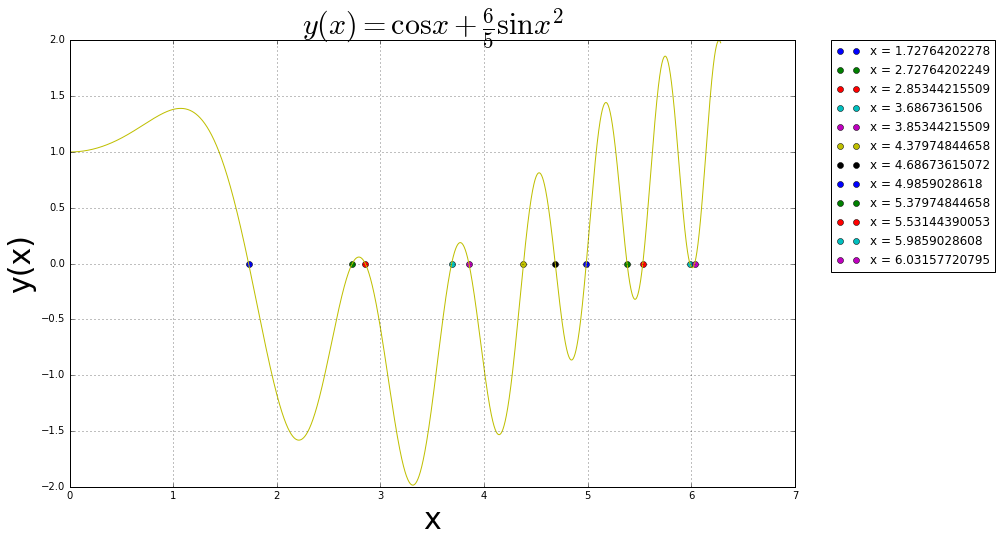

In [6]:
fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'$y(x) = \cos x + \frac{6}{5}\sin x^2$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y(x)',fontsize = 30)

candidatos = pseudoraices(prueba,[0,2*pi])
for i in xrange(len(candidatos)):
    root = Newton_Raphson(prueba,candidatos[i])
    plot([root],[0],'o', label = 'x = '+str(root))
    
time = arange(0,2*pi,.00001)
plot(time,prueba(time))
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

Notemos que el error de la raíz se de $10^{-8}$ pero para encontrarlas se hizo primero un barrido de paso $h= 10^{-2}$. Aunque no se tuvo problemas, en  el caso en el que el primer barrido no capturase todas las raíces, este paso debe hacerse más chico.

# Ejercicio 2

Ahora deseamos encontrar todas las raices de una función  $f:\mathbb{R}^2 \to \mathbb{R}$ dada por la expresión
$$
f(x, y) = 2e^{−(x+1)^2}\left(e^{−(y+2)^2} + e^{−(y−2)^2}\right)+ 6x(x^2 + y^2) e^{−(x^2+y^2)} − 1
$$

In [10]:
def funcion_fea(x):  #x es un arreglo de dos entradas
    xmas1 = (x[0] + 1.)**2
    ymas2 = (x[1] + 2.)**2
    ymen2 = (x[1] - 2.)**2
    r2 = x[0]**2 + x[1]**2
    return 2.*exp(-xmas1)*(exp(-ymas2) + exp(-ymen2)) + 6.*x[0]*r2*exp(-r2)-1

Aquí escribiremos un código para encontrar las raices de una función escalar con entradas en dos dimensiones. La función bisección funciona para funciones de $n$ variables y encuentra sólo una raíz dado un intervalo. 

In [11]:
def biseccion(func, r_l, r_r ,err=1e-8):
    r_l, r_r = array(r_l) , array(r_r)
    root = 0.5*(r_l+ r_r)     
    f_l, f_r = func(r_l) , func(r_r)   

    while abs(f_l - f_r)>= err:
        f_m = func(root)
        if f_m==.0:
            break
        if f_l*f_m < 0:
            r_r = root
        else:
            r_l = root
        root = 0.5 *(r_l+r_r)
        f_l, f_r = func(r_l) , func(r_r)
    return array(root)   

Como queremos no sólo una raíz, sino todas, se hará lo mismo que en el ejercicio 1. Se barrera la región deseada en pasos más "grandes" en comparación a la presición que deseamos. Cuando un el producto de los extremos de la función sea negativo entonces garantizamos que ahí hay una raíz, entonces ese intervalo será utilizado para encontrar una raíz con la función definida arriba. El valor dado por biseccion se almacenará y se seguirá con el barrido del grid utilizado.

Dado que no conocemos de antemano el número de raíces que nos podemos encontrar, se declaran listas vacías que a las que se les concatena las coordenadas de las raíces encontradas. No se utilizan arreglos de ceros porque no necesariamente el punto $(0,0)$ es una raíz de la función.

In [12]:
def raices_mapeo(func, intervalo, h=1e-2):  #intervalo = [x_i,x_f,y_i,y_f]
    x = arange(intervalo[0],intervalo[1]+h,h)
    y = arange(intervalo[2],intervalo[3]+h,h)
    x_roots = []
    y_roots = []
    
    for i in xrange(len(x)-1):
        for j in xrange(len(y)-1):
            r_l = [x[i], y[j]]
            r_r = [x[i], y[j+1]]
            f_l, f_r = func(r_l) , func(r_r)
            
            if f_l*f_r<=0:
                raiz = biseccion(func,r_l,r_r)
                x_roots.append(raiz[0])
                y_roots.append(raiz[1])
                
    return array([x_roots, y_roots])

###  Gráficas obtenidas

A continuación se muestras las raices obtenidas con 3 grids distintos. El tiempo de cómputo se encuentra debajo de cada una.

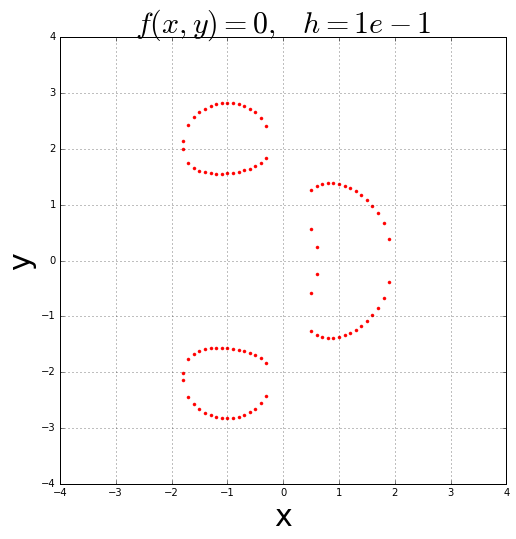

Wall time: 466 ms


In [13]:
%%time

fig, ax = plt.subplots(figsize=(8, 8))
grid(True)
title(r'$f(x, y) =  0,\; \;\; h = 1e-1$',fontsize = 30)
xlabel('x',fontsize=30 ),ylabel('y',fontsize = 30)

rootsX, rootsY =  raices_mapeo(funcion_fea,[-4,4,-4,4],1e-1)

xlim([-4,4]), ylim([-4,4])
plot(rootsX,rootsY,'.',color = 'r')
show()

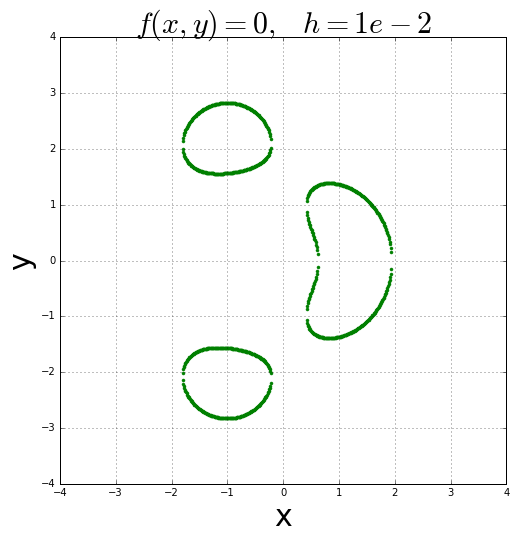

Wall time: 10.4 s


In [14]:
%%time

fig, ax = plt.subplots(figsize=(8, 8))
grid(True)
title(r'$f(x, y) =  0,\; \;\; h = 1e-2$',fontsize = 30)
xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

rootsX, rootsY =  raices_mapeo(funcion_fea,[-4,4,-4,4])

xlim([-4,4]), ylim([-4,4])
plot(rootsX,rootsY,'.',color = 'g')
show()

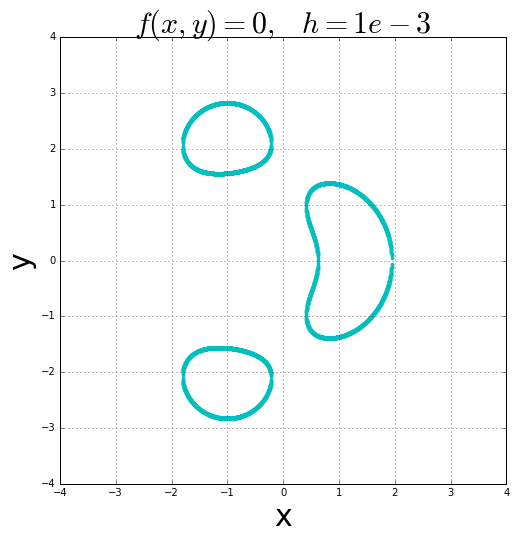

Wall time: 14min 39s


In [15]:
%%time

fig, ax = plt.subplots(figsize=(8, 8))
grid(True)
title(r'$f(x, y) =  0,\; \;\; h = 1e-3$',fontsize = 30)
xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

rootsX, rootsY =  raices_mapeo(funcion_fea,[-4,4,-4,4],1e-3)

xlim([-4,4]), ylim([-4,4])
plot(rootsX,rootsY,'.',color = 'c')
show()

En estas tres gráficas se puede observar la influencia que tien el tamaño del grid utilizado y el número de raíces que encunetra el algoritmo. Sin embargo, cabe destacar lo mucho que se prolonga el tiempo de cómputo al hacer más chico el paso. A pesar de que en el paso de $h = 10^{-3}$ se encuntran raíces que no se detectan en el de $h=^{-2}$, el timepo, con una interpolación esos resultados pueden obtenerse y el tiempo de cómputo es evidentemente menor.

# Ejercicio 3

Ahora se modelará una pelóta cayendo en un plano inclinado con la presencia de dos modelos distintos de fricción.
Sabemos que la ecuación de movimiento es la siguiente:
$$ m \ddot{\vec r} = -mg \hat{e_y} + fric(\dot{\vec{r}}),$$
donde $ fric(\dot{\vec{r}})$ es una función que depende únicamente de las velocidad. En este caso se asumirá que esta función es es una fuerza proporcional a la velocidad o bien, al cuadrado de la velocidad. Es decir:
$$ m \ddot{\vec r} = -mg \hat{e_y} + \gamma \dot{\vec{r}}   ---------- (1)\\
m \ddot{\vec r} = -mg \hat{e_y} + \gamma ||\dot{\vec{r}}|| \dot{\vec r}  --------- (2)
$$

Haciendo los cambios de variable $u_1 = x,\, u_2 = \dot x, \, v_1 = y\mbox{ y } v_2 = \dot y$, el sistema de ecuaciones a resolver es el siguiente:

$$
\left(\begin{array}{c}\dot u_1 \\ \dot v_1 \\ \dot u_2\\ \dot v_2\end{array}\right) = \left(\begin{array}{c} u_2 \\ v_2 \\ \frac{1}{m} fric(u_1)\\-g +\frac{1}{m} fric(v_1)\end{array}\right)
$$

Los modelos de fricción descritos en (1) y (2), descompuestos en componentes, y la ecuación de movimiento a resolver son las siguientes:

In [16]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

In [17]:
def e_mov(r_v,t,fric=0, g=9.8,m=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = 0,-g
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]/m
        dvy = -g- fric([r_v[2],r_v[3]])[1]/m
    return array([dx,dy,dvx,dvy])

Recordemos que para el caso en el que la pelota cae y rebota al suelo (sin que tenga inclinación) la componente $y$ era reflejada al hacer contacto, mientras que la componente $x$ se mantenía invariente. Para el caso del plano inclinado lo que sucede es que la componente de la velocidad penpendicular al plano es la que se refleja y la paralela se mantiene invariante. Para poder simular esto, en la función \emph{rebote} que dará las nuevas condiciones al hacer ontacto con el \emph{plano}, las velocidades serán rotadas el ángulo de inclinación del plano mediante la transformación siguiente:

Con la transformación de coordenadas:
$$
\left(\begin{array}{c}x'\\y'\\\dot x'\\\dot y' \end{array}\right) = \left(\begin{array}{c c c c}1 & 0 & 0 & 0\\0& 1& 0 &0 \\0&0& \cos\theta & -\sin\theta\\0&0&\sin\theta & \cos\theta \end{array}\right) \left(\begin{array}{c}x\\y\\\dot x \\ \dot y \end{array}\right) 
$$

Además, las condiciones para el rebote ya no serán cuando la solución a la ecuación diferencial sea igual a cero, sino cuando esta solución menos la recta que simula el plano sea igual a cero. De igual forma, declaremos el método de Runge-Kutta ora resolver la ecuación de movimiento.

In [23]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [24]:
def rot_vel(ang):
    ang = ang*pi/180.
    return array([1,0,0,0]),array([0,1,0,0]),array([0,0,cos(ang),-sin(ang)]),array([0,0,sin(ang),cos(ang)])

In [25]:
def plano(x,angulo):
    return -tan(angulo*pi/180.)*x

In [26]:
def rebote(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]

    while abs(y_izq[1]-plano(y_izq[0],ang))>1e-5:
        if (y_izq[1]-plano(y_izq[0],ang))*(y_med[1]-plano(y_med[0],ang))<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

Además vamos a definir una función que haga todo el cálculo y que regrese los datos sólo para graficar.

In [27]:
def datos_graf(cond_ini, ang, modelo_fric=0,pts=100, dt=0.1):
    N = pts
    inicio = cond_ini
    trayectoria = zeros((N,len(inicio)))
    mi_dt = dt
    trayectoria[0,:] = array(inicio)
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt], modelo_fric)
    
        if sol_dt[-1,:][1]-plano(sol_dt[-1,:][0], ang) < 0:
            y_izq = rebote(trayectoria[i,:],mi_dt,ang)    
            trayectoria[i+1,:] = y_izq
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
    return trayectoria

# Incisos  a) y b): Correr la simulación para los modelos de fricción

Veremos el caso para el plano con un ángulo de $0^{\circ}$, $15^{\circ}$, $30^{\circ}$ y $45^{\circ}$  , con vel. iniciales positivas y con los modelos de fricción distintos y considerando el caso ideal de no fricción. Se pondrá como condición inicial que la pelota esté suspendida en el aire y simplemente se deja caer ( a excepción del plano sin inclinación). Esto debido a que al rebotar multiples veces, se modelaran las condiciones de velocidades iniciales positivas. El propósito de poner un plano sin inclinación es ver que el programa también considera este caso.

In [38]:
modelos = [0 , fric_v, fric_v2]
etiquetas = ['Sin friccion','Proporcinal a V','Proporcional a V^2']

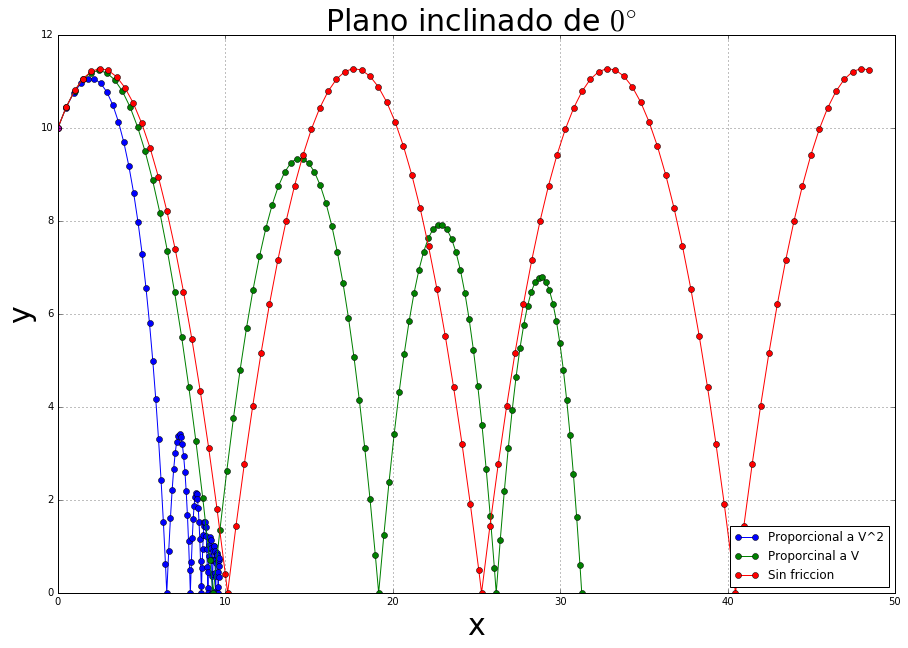

In [74]:
inicio = [0,10, 5, 5]
angulo = 0.

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $0^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio,angulo,modelos[2-i])
    plot(trayectoria[:,0],trayectoria[:,1],'o-', label = str(etiquetas[2-i]))
plot(trayectoria[:,0],plano(trayectoria[:,0],angulo))
plot(inicio[0],inicio[1],'o')
ax.legend(loc='lower right')
show()

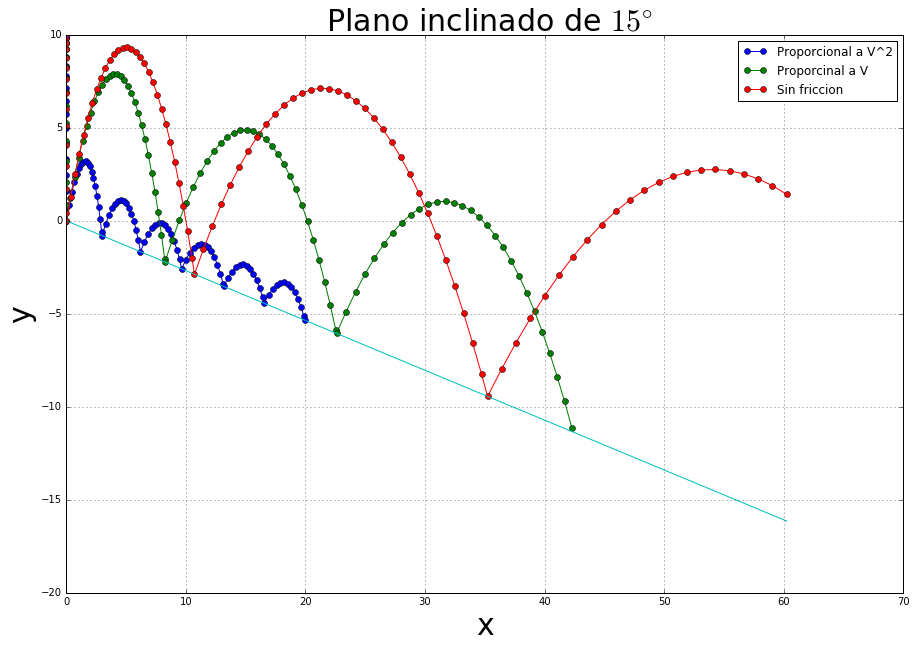

In [73]:
inicio = [0,10, 0, 0]
angulo = 15

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $15^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio,angulo,modelos[2-i])
    plot(trayectoria[:,0],trayectoria[:,1],'o-', label = str(etiquetas[2-i]))
plot(trayectoria[:,0],plano(trayectoria[:,0],angulo))
plot(inicio[0],inicio[1],'o')
ax.legend(loc='upper right')
show()

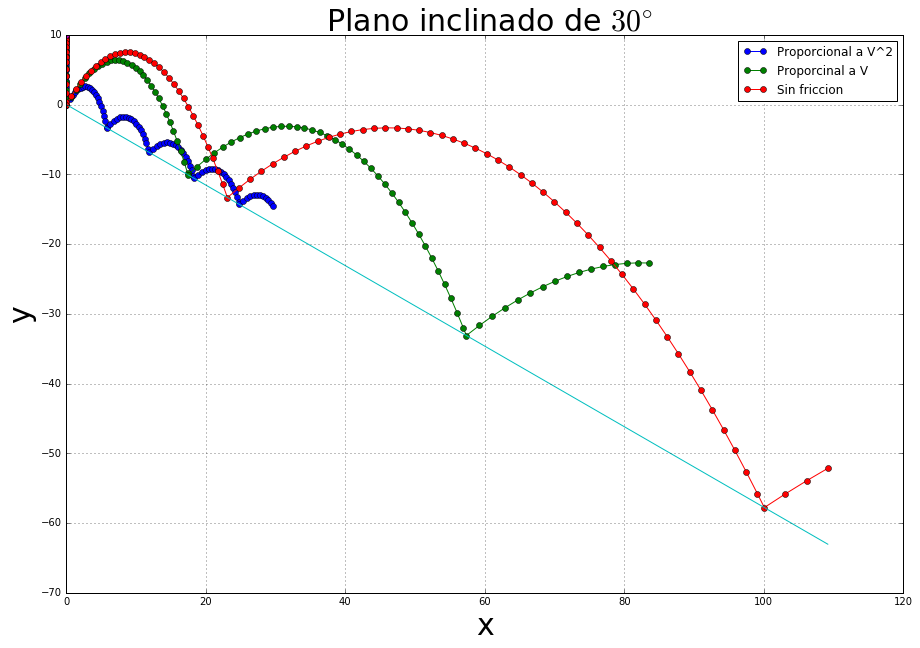

In [71]:
inicio = [0,10, 0, 0]
angulo = 30

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $30^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio,angulo,modelos[2-i])
    plot(trayectoria[:,0],trayectoria[:,1],'o-', label = str(etiquetas[2-i]))
plot(trayectoria[:,0],plano(trayectoria[:,0],angulo))
plot(inicio[0],inicio[1],'o')
ax.legend(loc='upper right')
show()

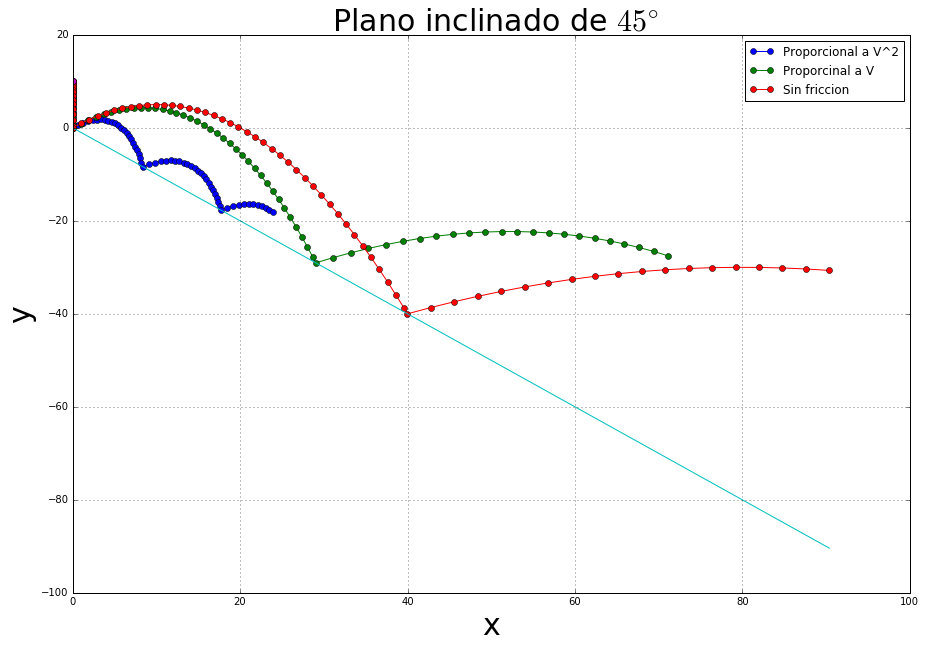

In [69]:
inicio = [0,10, 0, 0]
angulo = 45

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $45^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio,angulo,modelos[2-i],75)
    plot(trayectoria[:,0],trayectoria[:,1],'-o', label = str(etiquetas[2-i]))
plot(trayectoria[:,0],plano(trayectoria[:,0],angulo))
plot(inicio[0],inicio[1],'o')
ax.legend(loc='upper right')
show()

## c) 
Ahora queremos una velocidad inicial tal que cumpla
$$ \tan^{-1}\left(\frac{v_{0y}}{v_{0x}}\right)>\alpha, $$
con $\alpha = 15^\circ, 30^\circ, 45^\circ$

Para el primer caso se usarán los valores de $v_{0y}=v_{0x}=-5$, para el segundo caso se usarán los valores de $v_{0y}=v_{0x}=-10$. Para el tercer caso $v_{0y} = -10\, ,v_{0x} = -5$.

Todas las trayectorias están marcadas por la línea punteada y el punto es en donde iniciaron las trayevtorias. Al final se comenta lo sucedido.

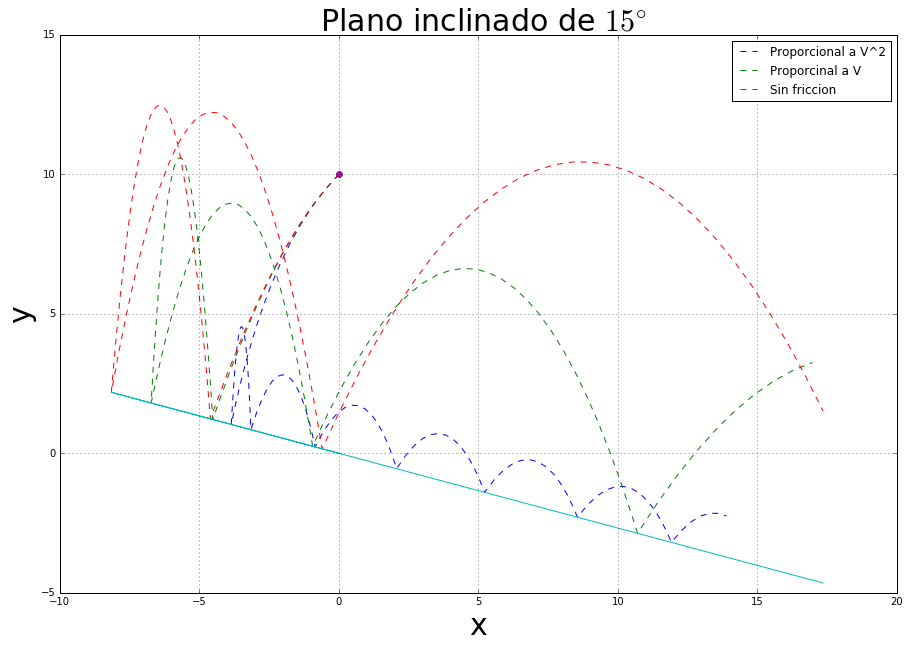

In [66]:
inicio = [0,10, -5, -5]
angulo = 15

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $15^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio, angulo, modelos[2-i])
    plot(trayectoria[:,0],trayectoria[:,1],'--',label = str(etiquetas[2-i]))
plot(trayectoria[:,0],plano(trayectoria[:,0],angulo))
ax.legend(loc='upper right')
plot(inicio[0],inicio[1],'o')
show()

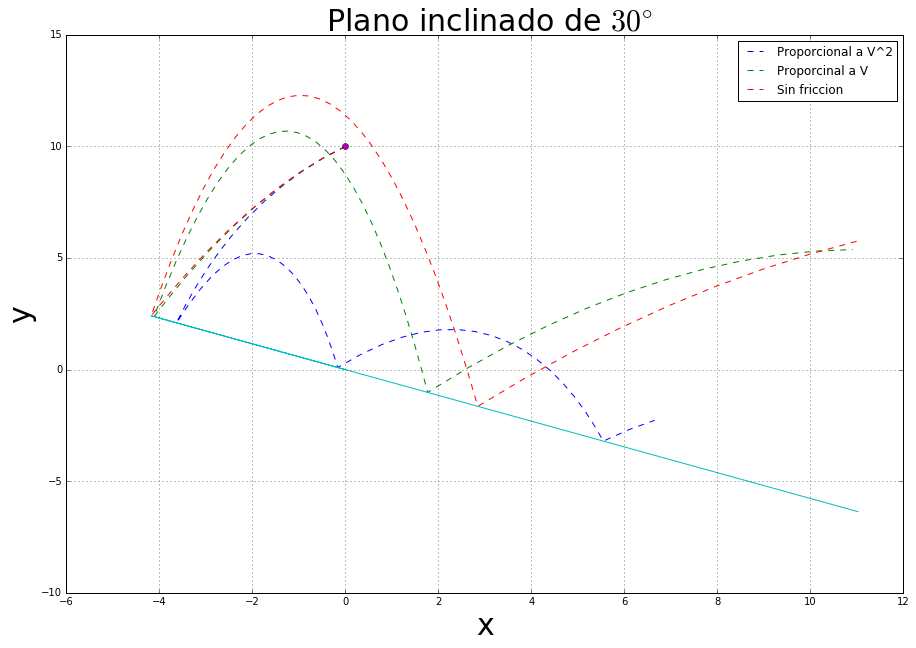

In [65]:
inicio = [0,10, -5, -5]
angulo = 30

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $30^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio, angulo, modelos[2-i],50)
    plot(trayectoria[:,0],trayectoria[:,1],'--',label = str(etiquetas[2-i]))
plot(trayectoria[:,0],plano(trayectoria[:,0],angulo))
plot(inicio[0],inicio[1],'o')
ax.legend(loc='upper right')
show()

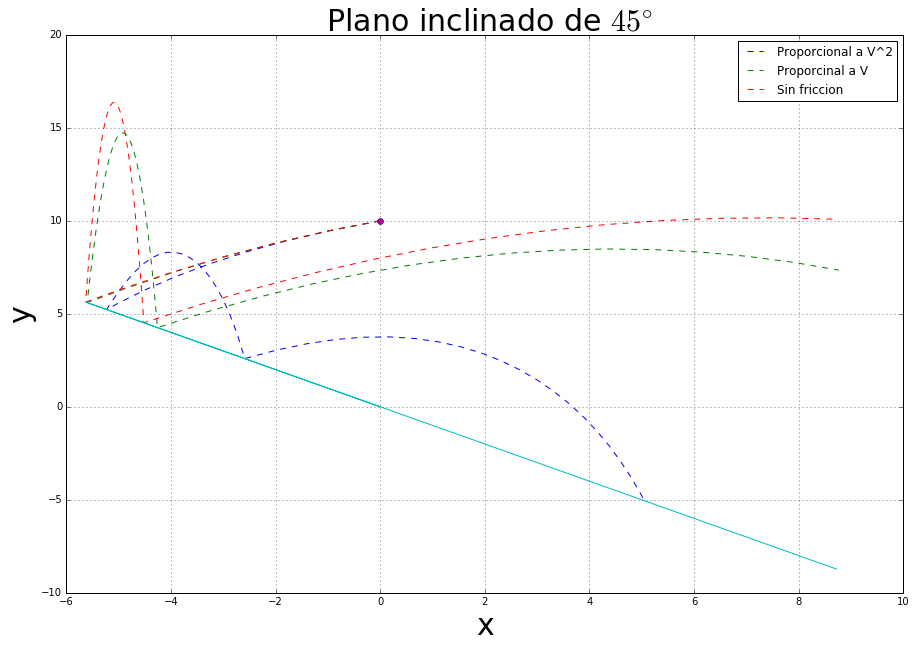

In [64]:
inicio = [0,10, -10, -5]
angulo = 45

fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title(r' Plano inclinado de $45^{\circ}$',fontsize = 30),xlabel('x',fontsize=30),ylabel('y',fontsize = 30)

for i in xrange(len(modelos)):
    trayectoria = datos_graf(inicio, angulo, modelos[2-i],50)
    plot(trayectoria[:,0],trayectoria[:,1],'--',label = str(etiquetas[2-i]))
plot(trayectoria[:,0],plano(trayectoria[:,0],angulo))
plot(inicio[0],inicio[1],'o')
ax.legend(loc='upper right')
show()

Podemos observarver en estas simulaciones que la pelota al rebotar por primera vez en el piso, dependiendo de la magnitud de las velocidades pero debido a sus signos, sale en dirección vertical. Para el plano de $15^\circ$ incluso sigue su traycetoria hacia arriba pero llega un momento en donde esta se invierte. Paraángulos más extremos este comportamiento se acentúa.